# IMPORTANTO DATOS CON PYTHON, BÁSICO

## INTRODUCCIÓN Y DATOS PLANOS

In [1]:
# Para checar cualquier archivo de texto sin formato, se puede usar la función open para abrir una conexión con el archivo:

filename = "C:/Users/marco/Data Camp Python/Datasets/seaslug.txt"
file = open(filename, mode = "r") # "r" es por "read"
text = file.read()
file.close()

print(text)

# Este caso ejemplifica cómo importar un archivo de texto, que pudiera ser un texto literal
# El mode = "w" se usa para escribir sobre un archivo de texto

# Alternativamente:

with open("C:/Users/marco/Data Camp Python/Datasets/seaslug.txt") as file:
    print(file.read())

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133
Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133


### Datos planos

Se trata de archivos de texto que contienen registros, como tablas de datos. Tienen renglones de campos o atributos y columnas de característica o atributo.

Los datos planos pueden ser del tipo CSV o TXT.

Si se quiere importar un archivo solo de números, es preferible utilizar una matriz de NumPy; si los datos contienen cadenas, es mejor usar un dataframe de Pandas.

NOTA: Las matrices de NumPy son esenciales para el uso de otros paquetes, como scikit-learn, de machine learning.

In [2]:
import numpy as np

# Las funciones básicas de NumPy para importar datos son np.loadtxt(filename, delimiter = "", skiprows = 1, usecols = [],
# dtype = str)

# loadtxt() es bueno para datasets con un solo tipo de datos.

# y genfromtxt()


['Time' 'Percent']


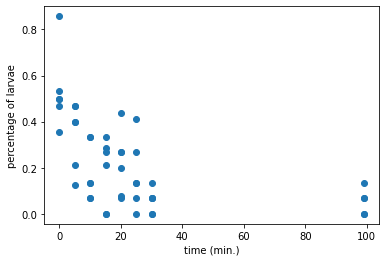

In [3]:
import numpy as np
import matplotlib.pyplot as plt

file = "C:/Users/marco/Data Camp Python/Datasets/seaslug.txt"

data = np.loadtxt(file, delimiter = "\t", dtype = str)

print(data[0])

data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)

plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

In [4]:
file = 'C:/Users/marco/Data Camp Python/Datasets/titanic_sub.csv'

d = np.recfromcsv(file, delimiter = ",", names = True, dtype = None)

print(d[:3])


[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importación de datos planos con Pandas

In [5]:
import pandas as pd

df = pd.read_csv('C:/Users/marco/Data Camp Python/Datasets/titanic_sub.csv')

print(df.head())

data_array = df.values # Para transformar el dataset en una matriz 

print(type(data_array))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
<class 'numpy.ndarray'>


## IMPORTANDO DATOS DE OTRO TIPO

### Excel

In [6]:
# Para importar Excel, y solo determinadas hojas de cálculo:

import pandas as pd

file = "C:/Users/marco/Data Camp Python/Datasets/battledeath.xlsx"

xls = pd.ExcelFile(file)

print(xls.sheet_names)

df1 = xls.parse("2004") # se puede indicar el nombre de la hoja

print(df1.head())

df2 = xls.parse(0) # o bien, el índice

print(df2.head())


['2002', '2004']
  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [7]:
df1 = xls.parse(0, skiprows=0, names=["Country", "AAM due to War (2002)"]) # para renombrar las columnas:

print(df1.head())

###

df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country']) 

print(df2.head())

       Country  AAM due to War (2002)
0  Afghanistan              36.083990
1      Albania               0.128908
2      Algeria              18.314120
3      Andorra               0.000000
4       Angola              18.964560
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


### SAS/STATA

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


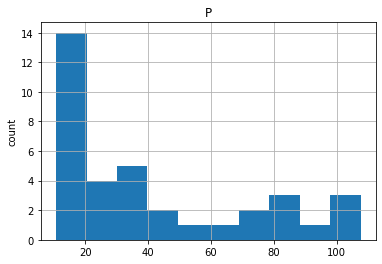

In [8]:
from sas7bdat import SAS7BDAT

with SAS7BDAT('C:/Users/marco/Data Camp Python/Datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

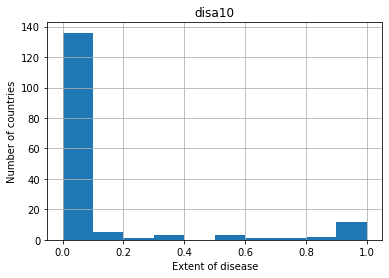

In [9]:
import pandas as pd

df = pd.read_stata("C:/Users/marco/Data Camp Python/Datasets/disarea.dta")

print(df.head())

pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


### HDF5

Este tipo de formato permite almacenar gigas, teras e incluso exabytes de datos.

<class 'h5py._hl.files.File'>
meta
quality
strain
Strain


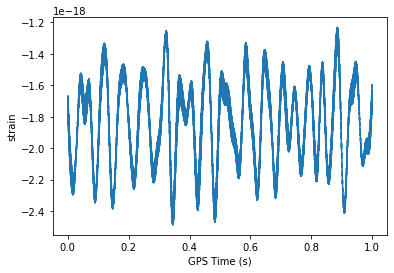

In [10]:
import numpy as np
import h5py

file = "C:/Users/marco/Data Camp Python/Datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5"

data = h5py.File(file, "r")

print(type(data))

for key in data.keys():
    print(key)

###

# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


### MATLAB

Para este tipo de archivos, se usa el paquete SciPy

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


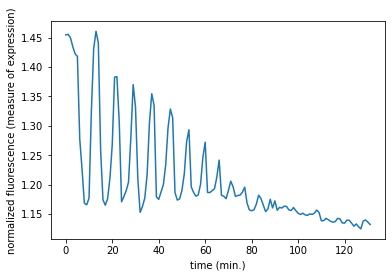

In [11]:
import scipy.io

mat = scipy.io.loadmat("C:/Users/marco/Data Camp Python/Datasets/ja_data2.mat")

print(type(mat))

print(mat.keys())

print(type(mat["CYratioCyt"]))

print(np.shape(mat['CYratioCyt']))

data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()



## BASES RELACIONALES

Son bases de datos basadas en el modelo de datos relacional. Intuitivamente, se trata de varias tablas cuyas variables o valores se relacionan entre sí.

In [12]:
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///C:/Users/marco/Data Camp Python/Datasets/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("select * from album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))


   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


# IMPORTANTO DATOS CON PYTHON, INTERMEDIO

## DATOS DE INTERNET

In [13]:
# Los paquetes urllib y requests son útiles para realizar web scrapping

# urllib provee de un interfaz de alto nivel para ibtener datos de internet

     # El comando urlopen() acepta URLs en lugar de nombres de archivos

from urllib.request import urlretrieve

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

urlretrieve(url, "winequality-white.csv")

('winequality-white.csv', <http.client.HTTPMessage at 0x181191610a0>)

In [14]:
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

urlretrieve(url, "winequality-red.csv")

df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

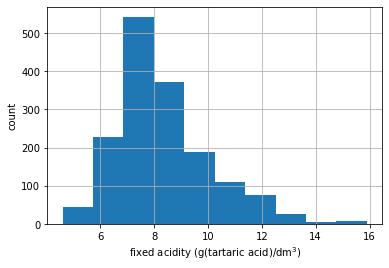

In [15]:
# Para guardarlo como dataset:

url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

df = pd.read_csv(url, sep = ";")

print(df.head())

df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


In [16]:
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

xls = pd.read_excel(url, sheet_name = None)

print(xls.keys())

print(xls["1700"].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### HTTP requests

In [17]:
# Por ejemplo, para extraer el HTML de la página de inicio de Wikipedia:

from urllib.request import urlopen, Request

url = "http://www.wikipedia.org/"

request = Request(url)
response = urlopen(request)
html = response.read()
response.close()

In [18]:
import requests

url = "http://wikipedia.org/"

r = requests.get(url)

text = r.text

In [19]:
# Ejemplo

url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

request = Request(url)

response = urlopen(request)

html = response.read()

print(type(response))

response.close()


<class 'http.client.HTTPResponse'>


In [20]:
# Alternativamente:

import requests

url = "http://www.datacamp.com/teach/documentation"

r = requests.get(url)

text = r.text

print(text)

<!DOCTYPE HTML>
<html lang="en-US">
<head>
  <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
  <meta name="robots" content="noindex, nofollow" />
  <meta name="viewport" content="width=device-width,initial-scale=1" />
  <title>Just a moment...</title>
  <style>
    html, body {width: 100%; height: 100%; margin: 0; padding: 0;}
    body {background-color: #ffffff; color: #000000; font-family:-apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", Roboto, Oxygen, Ubuntu, "Helvetica Neue",Arial, sans-serif; font-size: 16px; line-height: 1.7em;-webkit-font-smoothing: antialiased;}
    h1 { text-align: center; font-weight:700; margin: 16px 0; font-size: 32px; color:#000000; line-height: 1.25;}
    p {font-size: 20px; font-weight: 400; margin: 8px 0;}
    p, .attribution, {text-align: center;}
    #spinner {margin: 0 auto 30px auto; display: block;}
    .attribution {margin-top: 32px;}
    @keyframes fader     { 0% {opacity: 0.2;} 50% {opacity: 1.0;} 100% {opacity: 0.2;} }
    @-we

### Web Scrapping con Python

In [21]:
from bs4 import BeautifulSoup

import requests

url = "https://www.crummy.com/software/BeautifulSoup/"

r = requests.get(url)

html_doc = r.text

soup = BeautifulSoup(html_doc) # Este paquete reorganiza el objeto html en la forma correcta para su despliegue

print(soup.prettify())

# BeautifulSoup tiene métodos como soup.title() o soup.get_text() o spup.find_all()

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [22]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Public

In [23]:
# Para extraer el título y texto:

guido_title = soup.title

print(guido_title)

guido_text = soup.get_text()

print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "l

In [24]:
# Y para encontrar todos los hipervínculos:

a_tags = soup.find_all("a") # "a" define a los hipervínculos

for link in a_tags:
    print(link.get("href"))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## INTERACTUANDO CON APIs

Una API es un conjunto de protocolos y rutinas para crear e interactuar con aplicaciones de software.

El formulario estándar para la transferencia de datos a través de las APIs es el formato de archivo JSON.

El cargar JSONs en Python, se almacenan como diccionarios.

In [25]:
json_data = {"Ratings": [{"Source": "Internet Movie Database", "Value": "7.7/10"}, {"Source": "Rotten Tomatoes", "Value": "95%"}, {"Source": "Metacritic", "Value": "95/100"}], "Country": "USA", "imdbVotes": "550,434", "Rated": "PG-13", "Plot": "Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.", "Genre": "Biography, Drama", "Response": "True", "Released": "01 Oct 2010", "Language": "English, French", "DVD": "11 Jan 2011", "Poster": "https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg", "Production": "Columbia Pictures", "Director": "David Fincher", "Title": "The Social Network", "imdbRating": "7.7", "Writer": "Aaron Sorkin (screenplay), Ben Mezrich (book)", "Year": "2010", "Metascore": "95", "Type": "movie", "Runtime": "120 min", "Website": "http://www.thesocialnetwork-movie.com/", "imdbID": "tt1285016", "Actors": "Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons", "Awards": "Won 3 Oscars. Another 165 wins & 168 nominations.", "BoxOffice": "$96,400,000"}

# with open("a_movie.json") as json_file:
#   json_data = json.load(json_file)

for k in json_data.keys():
    print(k + ': ', json_data[k])

Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Country:  USA
imdbVotes:  550,434
Rated:  PG-13
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Genre:  Biography, Drama
Response:  True
Released:  01 Oct 2010
Language:  English, French
DVD:  11 Jan 2011
Poster:  https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Production:  Columbia Pictures
Director:  David Fincher
Title:  The Social Network
imdbRating:  7.7
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Year:  2010
Metascore:  95
Type:  movie
Runtime:  120 min
Website:  http://www.thesocialnetwork-movie.com/
imdbID:  tt1285016
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter,

### APIs e internet

In [26]:
import requests

url = "http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network"

r = requests.get(url)

json_data = r.json()

for key, value in json_data.items():
    print(key + ":", value)

Title: The Social Network
Year: 2010
Rated: PG-13
Released: 01 Oct 2010
Runtime: 120 min
Genre: Biography, Drama
Director: David Fincher
Writer: Aaron Sorkin, Ben Mezrich
Actors: Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot: As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language: English, French
Country: United States
Awards: Won 3 Oscars. 172 wins & 186 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore: 95
imdbRating: 7.8
imdbVotes: 687,228
imdbID: tt1285016
Type: movie
DVD: 11 Jan 2011
BoxOffice: $96,962,694
Production:

In [27]:
# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">
<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="it-Latn-fonipa">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nap-Latn-fonipa">[ˈpittsə]</span>) is a dish of  Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as various types of sausage, anchovies, mushrooms, onions, olives, vegetables, meat, ham, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in a restaurant is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, ho

## TWITTER API

El módulo tweepy es utilizado para realizar web scrapping en Twitter

Import package

import tweepy,json

Store OAuth authentication credentials in relevant variables

access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

Pass OAuth details to tweepy's OAuth handler

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

Initialize Stream listener

l = MyStreamListener()

Create you Stream object with authentication

stream = tweepy.Stream(auth, l)


Filter Twitter Streams to capture data by the keywords:

s = ['clinton', 'trump', 'sanders','cruz']
stream.filter(track = s)

Import package

import json

String of path to file: tweets_data_path

tweets_data_path = 'tweets.txt'

Initialize empty list to store tweets: tweets_data

tweets_data = []

Open connection to file

tweets_file = open(tweets_data_path, "r")

Read in tweets and store in list: tweets_data

for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

Close connection to file

tweets_file.close()

Print the keys of the first tweet dict

print(tweets_data[0].keys())


Import package

import pandas as pd

Build DataFrame of tweet texts and languages

df = pd.DataFrame(tweets_data, columns=['text','lang'])

Print head of DataFrame

print(df.head())

Initialize list to store tweet counts

[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

Iterate through df, counting the number of tweets in which
each candidate is mentioned

for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump',  row['text'])
    sanders += word_in_text('sanders',  row['text'])
    cruz += word_in_text('cruz',  row['text'])


Import packages

import seaborn as sns
import matplotlib.pyplot as plt

Set seaborn style

sns.set(color_codes=True)

Create a list of labels:cd

cd = ['clinton', 'trump', 'sanders', 'cruz']

Plot histogram

ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

# LIMPIEZA DE DATOS

## PROBLEMAS EN DATOS COMUNES

Al trabajar con datos, es común encontrar texto, enteros, decimales, binarios, fechas o datos categóricos.

In [28]:
sales = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/sales_subset.csv")

# Se pueden conocer los tipos de cada columna como sigue:

print(sales.dtypes)

# Y los NAs:

print(sales.info())

# Para eliminar un signo "$" se hace lo siguiente:

# df["column_name"] = sales["column_name"].str.strip("$")
# df["column_name"] = sales["column_name"].astype("int")

# Para asegurarse de que la columna ahora es efectivamente entero:

# assert sales["column_name"].dtype == "int"

# La cual no devuelve nada si se cumple la condición, y un error si no

assert 1 + 1 == 2
# assert 1 + 1 == 3

Unnamed: 0                int64
store                     int64
type                     object
department                int64
date                     object
weekly_sales            float64
is_holiday                 bool
temperature_c           float64
fuel_price_usd_per_l    float64
unemployment            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  floa

In [29]:
# A veces los números pueden indicar categorías, por lo que es necesario modificar su tipo:

# df["column_name"] = df["column_name"].astype("category")

In [30]:
# Ejemplo

ride_sharing = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/ride_sharing_new.csv")

print(ride_sharing.info())

print(ride_sharing["user_type"].describe())

# Pero las estadísticas corresponden a una variable numérica, cuando en realidad se quiere tratar como categórica:

ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype("category")

assert ride_sharing['user_type_cat'].dtype == 'category'

print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

In [31]:
# Si se quiere eliminar "minutes" de la columna duration:

ride_sharing["duration_trim"] = ride_sharing["duration"].str.strip("minutes")

ride_sharing["duration_time"] = ride_sharing["duration_trim"].astype("int")

assert ride_sharing["duration_time"].dtype == "int"

print(ride_sharing[['duration','duration_trim','duration_time']])
print((ride_sharing['duration_time']).mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Problemas con rangos

A veces, los datos pueden estar fuera de rango (una fecha en el futuro o una magnitud fuera del rango establecido).

Aunque estos datos podrían eliminarse, esto implica un riesgo de pérdida de información relevante.

Otra opción es establecer mínimos y máximos para cada columna.

O bien, tratarlos como NAs e imputarlos.

In [32]:
# Considérese el ejemplo de un dataset con calificaciones de películas, en donde algunos registros son iguales a 6

# Puede filtrarse:
# movies = movies[movies["avg_rating"] <= 5]
# Alternativamente:
# movies.drop(movies[movies["avg_rating"] > 5].index, inplace = True)
# Y comprobamos:
# assert movies["avg_rating].max() <= 5

# Para cambiar los valores fuera del rango:
# movies.loc[movies["avg_rating"] > 5, "avg_rating"] = 5
# Y comprobamos:
# assert movies["avg_rating].max() <= 5

# FECHAS:
# user_signups["subscription_date"] = pd.to_datetime(user_signups["subscription_date"]).dt.date
# today_date = dt.date.today()
# Entonces, para eliminar fechas futuras hay dos formas:
# user_signups = user_signups[user_signups["subscription_date"] < today_date]
# user_signups.drop(user_signups[user_signups["subscription_date"] > today_date].index, inplace = True)
# O crear un límite superior:
# user_signups.loc[user_signups["subscription_date"] > today_date, "subcription_date"] = today_date
# Y comprobarlo:
# asser user_signups.subscription_date.max().date() <= today_date

In [33]:
# Ejemplo

ride_sharing['station_A_id'] = ride_sharing['station_A_id'].astype('int')

ride_sharing.loc[ride_sharing["station_A_id"] > 80, "tire_sizes"] = 80

ride_sharing['station_A_id'] = ride_sharing["station_A_id"].astype("category")

print(ride_sharing['station_A_id'].describe())

count     25760
unique        9
top          67
freq       3635
Name: station_A_id, dtype: int64


### Restricciones de unicidad

In [34]:
# Se pueden encontrar duplicados así:

duplicates = ride_sharing.duplicated()

print(duplicates)

# Y para ver exactamente las columnas duplicadas:

ride_sharing[duplicates]

0        False
1        False
2        False
3        False
4        False
         ...  
25755    False
25756    False
25757    False
25758    False
25759    False
Length: 25760, dtype: bool


,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes


In [35]:
# Para calibrar correctamente el método .duplicate(), se usarán dos argumentos: subset para lsitar las columnas para
# checar por duplicidad; keep permite mantener o no la ocurrencia de un valor duplicado (first, last, False)

duplicates = ride_sharing.duplicated(subset = "user_gender", keep = "first")
  
ride_sharing[duplicates]

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,NaN
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,NaN
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4,NaN
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11,NaN
5,5,10 minutes,22,Howard St at Beale St,6,The Embarcadero at Sansome St,3279,2,1979,Male,2,10,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male,1,11,11,NaN
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male,2,10,10,NaN
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male,2,14,14,NaN
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male,2,14,14,NaN


In [36]:
# El método .drop_duplicates() se usa para eliminar a los duplicados

In [37]:
# Find duplicates
duplicates = ride_sharing.duplicated("bike_id", keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id    duration  user_birth_year
3638        11  12 minutes             1988
6088        11   5 minutes             1985
10857       11   4 minutes             1987
10045       27  13 minutes             1989
16104       27  10 minutes             1970
...        ...         ...              ...
8812      6638  10 minutes             1986
6815      6638   5 minutes             1995
8456      6638   7 minutes             1983
8300      6638   6 minutes             1962
8380      6638   8 minutes             1984

[25717 rows x 3 columns]


In [38]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': "min", 'duration': "mean"}

# Group by ride_id and compute new statistics
# ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
# duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
# duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
# assert duplicated_rides.shape[0] == 0

## PROBLEMAS DE TEXTO Y DE DATOS CATEGÓRICOS

In [39]:
airlines = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/airlines_final.csv")
data = [['Clean', "Neutral", "Very satisfied"], ['Average', "Very safe", "Neutral"], ['Somewhat clean', "Somewhat safe", "Somewhat satisfied"], ["Somewhat dirty", "Very unsafe", "Somewhat unsatisfied"], ["Dirty", "Somewhat unsafe", "Very Unsatisfied"]]
categories = pd.DataFrame(data, columns=['cleanliness', 'safety', "satisfaction"])

# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines["safety"].unique(), "\n")
print('Satisfaction: ', airlines["satisfaction"].unique(), "\n")

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines["cleanliness"]).difference(categories["cleanliness"])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very Unsatisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
      Unnamed: 0    id        day        airline        destination  \
0              0  1351    Tuesday    UNITED INTL             KANSAI   
1              1   373     Friday         ALASKA  SAN JOSE DEL CABO   


### Datos categóricos

Un problema común en los datos categóricos es la presencia de valores en mayúsculas.
Pueden usarse los méteodos str.upper() para capitalizar, o str.lower() para poner en minúsculas.

Otro problema suelen ser los espacios antes o después de las cadenas o categorías.
Para ello, se usa el método str.strip(), vacío, para eliminar espacios.

In [40]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines["dest_region"].unique())
print(airlines["dest_size"].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [41]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', "medium", "long"]

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines["wait_min"], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

print(airlines.head())

   Unnamed: 0    id        day      airline        destination    dest_region  \
0           0  1351    Tuesday  UNITED INTL             KANSAI           asia   
1           1   373     Friday       ALASKA  SAN JOSE DEL CABO  canada/mexico   
2           2  2820   Thursday        DELTA        LOS ANGELES        west us   
3           3  1157    Tuesday    SOUTHWEST        LOS ANGELES        west us   
4           4  2992  Wednesday     AMERICAN              MIAMI        east us   

  dest_size boarding_area   dept_time  wait_min     cleanliness  \
0       Hub  Gates 91-102  2018-12-31     115.0           Clean   
1     Small   Gates 50-59  2018-12-31     135.0           Clean   
2       Hub   Gates 40-48  2018-12-31      70.0         Average   
3       Hub   Gates 20-39  2018-12-31     190.0           Clean   
4       Hub   Gates 50-59  2018-12-31     559.0  Somewhat clean   

          safety        satisfaction wait_type day_week  
0        Neutral      Very satisfied    medium  week

### Limpieza de datos de texto

Los problemas más comunes del texto incluyen inconsistencias, violaciones de longitud y *typos*.

In [42]:
# Replace "Dr." with empty string ""
# airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Store length of each row in survey_response column
#resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
#airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
#assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
#print(airlines_survey['survey_response'])

## PROBLEMAS DE DATOS AVANZADOS

### Uniformidad

A veces se trabaja con datos en diferentes temperaturas, unidades de peso, formatos de fecha o divisas.
Para identificar valores atípicos que pudieran estar en otra escala, un scatterplot suele ser útil.

In [43]:
banking = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/banking_dirty.csv")

# Find values of acct_cur that are equal to 'euro'
# acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
# banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
# banking.loc[banking["acct_cur"] == "euro", 'acct_cur'] = "dollar"

# Assert that only dollar currency remains
# assert banking['acct_cur'].unique() == 'dollar'

In [44]:
# Print the header of account_opened
print(banking.account_opened.head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking.head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
   Unnamed: 0   cust_id  birth_date  Age  acct_amount  inv_amount   fund_A  \
0           0  870A9281  1962-06-09   58     63523.31       51295  30105.0   
1           1  166B05B0  1962-12-16   58     38175.46       15050   4995.0   
2           2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   
3           3  F2158F66  1985-11-03   35     84132.10       23712   3908.0   
4           4  7A73F334  1990-05-17   30    120512.00       93230  12158.4   

    fund_B   fund_C   fund_D account_opened last_transaction acct_year  
0   4138.0   1420.0  15632.0     2018-02-09         22-02-19      2018  
1    938.0   6696.0   2421.0     2019-02-28         31-10-18      2019  
2   4590.0   8469.0   1185.0     2018-04-25         02-04-18      2018  
3    492.0   6482.0  12830.0     2017-07-11         08-11-18      2017  
4  51281.0  13434.0  18383.0     2018-05-14         19-07-18

### Validación de campos cruzados

Se refiere al uso de múltiples campos del conjunto de datos para verificar la integridad de estos.

Por ejemplo, comprobar que la suma de las columnas A, B y C efectivamente sean la suma de la D.

In [45]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [46]:
# Store today's date and find ages
import datetime as dt
today = dt.date.today()
banking['birth_date'] = pd.to_datetime(banking['birth_date'], errors='coerce')
ages_manual = today.year - banking["birth_date"].dt.year - 2 

# Find rows where age column == ages_manual
age_equ = ages_manual == banking["Age"]

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  8


### Completitud

La falta de datos puede deberse a:

- Faltan completamente al azar: no existe una relación sistemática entre los valores faltantes de una columna y otros valores o valores propios.
b
- Falta al azar: existe una relación sistemática entre los valores faltantes de una columna y otros valores observados.

- Falta no al azar: existe una relación sistemática entre los valores faltantes de una columna y los valores no observados.

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


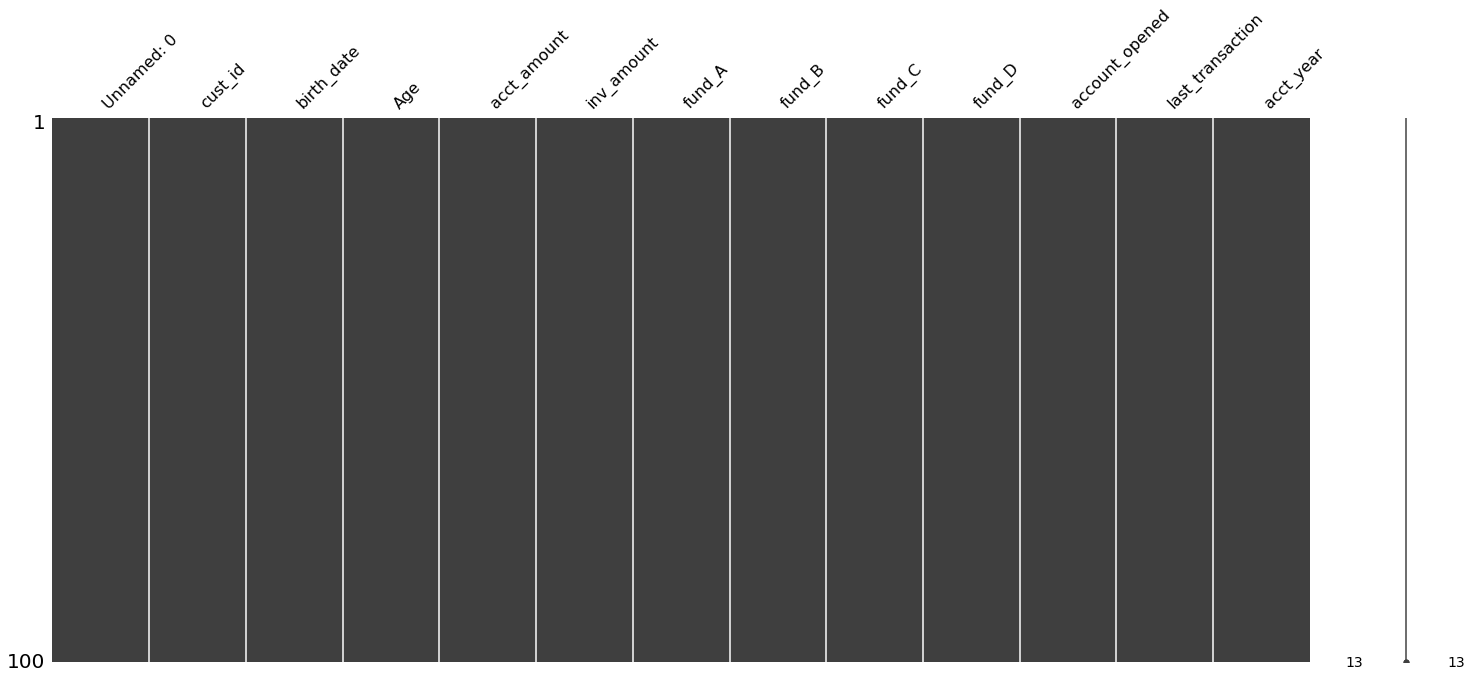

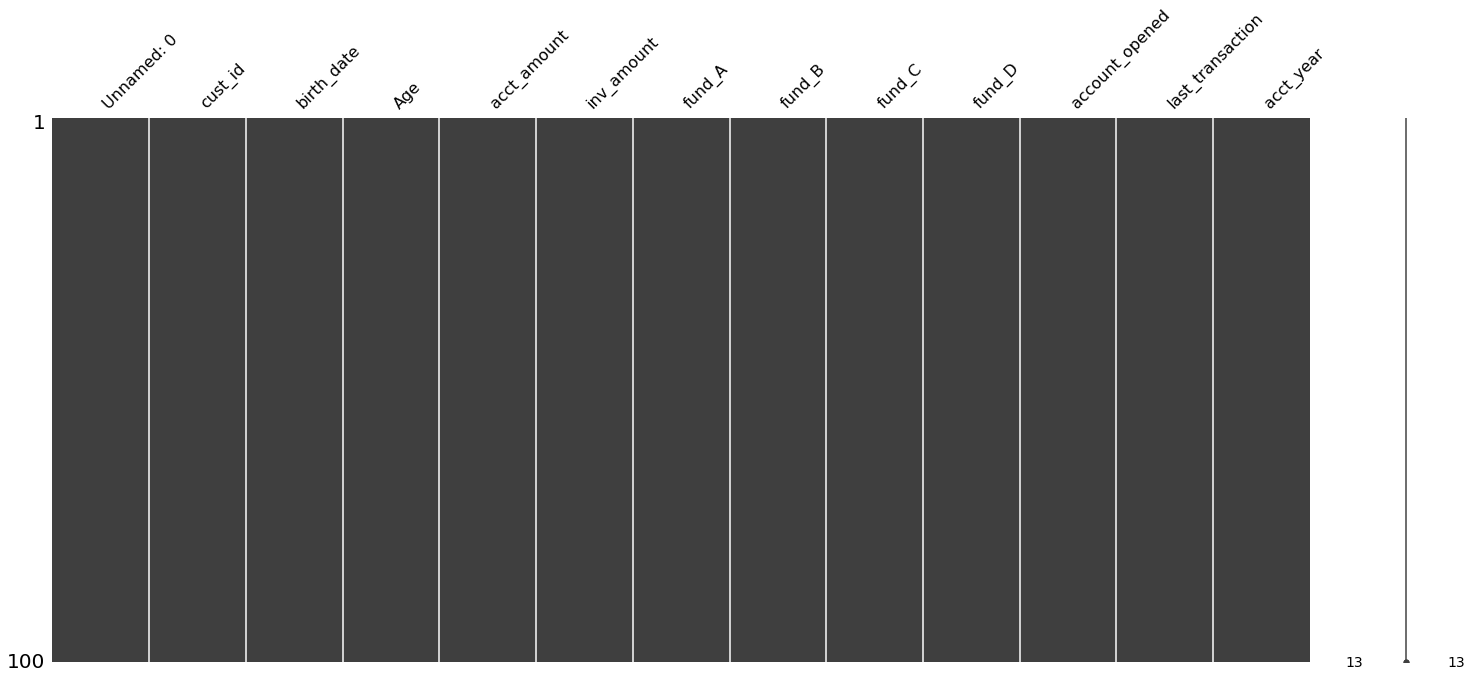

In [47]:
# Print number of missing values in banking
import missingno as msno

print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking["inv_amount"].isna()]
investors = banking[~banking["inv_amount"].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = "Age")
msno.matrix(banking_sorted)
plt.show()

In [48]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid["inv_amount"]*5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


## ENLACE DE REGISTRO

### Distancia mínima de edición

La distancia mínima de edición es una forma sistemática para identificar qué tan cerca están 2 cadenas.

Considérense las palabras "intention" y "execution". Su distancia mínima de edición es el número de pasos mínimos necesarios para transicionar de una cadena a otra.

Las operaciones posibles son:

1. Inserción;
2. Eliminación;
3. Sustitución; y
4. Transposición.

Para esto se usa el paquete fuzzywuzzy

In [49]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

print(fuzz.WRatio("Houston Rockets", "Rockets")) # Que arroja un índice de similitud entre ambas cadenas

string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(["Rockets vs Lakers", "Lakers vs Rockets", "Houson vs Los Angeles", "Heat vs Bulls"])

print(process.extract(string, choices, limit = 4)) # Que arroja la cadena en cuestión, el índice de similitud y su posición

90
[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1), ('Houson vs Los Angeles', 86, 2), ('Heat vs Bulls', 86, 3)]


C:\Users\marco\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [50]:
# Ejemplo

restaurants = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/restaurants_L2_dirty.csv")

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants["type"].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract("italian", unique_types, limit = len(unique_types)))

[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

In [51]:
# Inspect the unique values of the cuisine_type column
print(restaurants["type"].unique())

# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract("italian", restaurants["type"], limit = len(restaurants.type))

# Inspect the first 5 matches
print(matches[0:5])

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants["type"] == match[0]] == "italian"


['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']
[('italian', 100, 14), ('italian', 100, 21), ('italian', 100, 47), ('italian', 100, 57), ('italian', 100, 73)]


In [52]:
    
# Iterate through categories
categories = ['italian', 'asian', 'american']
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

# Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine

# Inspect the final result
print(restaurants['type'].unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'middle eastern' 'asian'
 'vietnamese' 'health food' 'pacific new wave' 'indonesian' 'eclectic'
 'chicken' 'fast food' 'southern/soul' 'coffeebar' 'continental'
 'french ( new )' 'desserts' 'chinese' 'pizza']


### Generando pares

In [53]:
import recordlinkage

restaurants_new = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/restaurants_L2.csv")

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block("type")

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Create a comparison object
comp_cl = recordlinkage.Compare()

# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label = 'type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  type  name
0  0       0     1   0.0
   1       0     1   0.0
   2       0     1   0.0
   3       0     1   0.0
   4       0     1   0.0
...      ...   ...   ...
55 221     1     1   0.0
   230     1     1   0.0
   233     1     1   0.0
   238     1     1   0.0
   241     1     1   0.0

[4152 rows x 3 columns]


### Vinculando dataframes

In [54]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

    Unnamed: 0                name                    addr           city  \
0     american            american                american       american   
1     american            american                american       american   
2            2             parkway    510 s. arroyo pkwy .       pasadena   
3            3                r-23        923 e. third st.    los angeles   
4            4               gumbo       6333 w. third st.             la   
..         ...                 ...                     ...            ...   
331        331   vivande porta via      2125 fillmore st.   san francisco   
332        332  vivande ristorante   670 golden gate ave.   san francisco   
333        333        world wrapps      2257 chestnut st.   san francisco   
334        334             wu kong          101 spear st.   san francisco   
335        335           yank sing        427 battery st.   san francisco   

          phone          type  
0      american      american  
1      amer

# TRANSORMACIÓN DE DATOS CON PANDAS

## INTRODUCCIÓN A LA TRANSFORMACIÓN DE DATOS

In [55]:
fifa_players = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/players_20.csv")

# Este tipo de dataset es del formato wide, donde cada característica es una columna, cada renglón contiene varias características

fifa_players.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [56]:
# Para transponer un dataset:

fifa_players.set_index("club")[["short_name", "nationality"]].transpose()

club,FC Barcelona,Juventus,Paris Saint-Germain,Atlético Madrid,Real Madrid,Manchester City,FC Barcelona,Liverpool,Real Madrid,Liverpool,...,Finn Harps,Dalian YiFang FC,Carlisle United,Derry City,Waterford FC,Beijing Renhe FC,Shanghai SIPG FC,Hebei China Fortune FC,Shanghai Greenland Shenhua FC,Hebei China Fortune FC
short_name,L. Messi,Cristiano Ronaldo,Neymar Jr,J. Oblak,E. Hazard,K. De Bruyne,M. ter Stegen,V. van Dijk,L. Modrić,M. Salah,...,M. Gallagher,Huang Jiahui,M. Sagaf,E. Tweed,P. Martin,Shao Shuai,Xiao Mingjie,Zhang Wei,Wang Haijian,Pan Ximing
nationality,Argentina,Portugal,Brazil,Slovenia,Belgium,Belgium,Germany,Netherlands,Croatia,Egypt,...,Republic of Ireland,China PR,England,Republic of Ireland,Republic of Ireland,China PR,China PR,China PR,China PR,China PR


In [57]:
# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('short_name')[['height_cm', 'weight_kg']].transpose()

# Print fifa_transpose
print(fifa_transpose)

short_name  L. Messi  Cristiano Ronaldo  Neymar Jr  J. Oblak  E. Hazard  \
height_cm        170                187        175       188        175   
weight_kg         72                 83         68        87         74   

short_name  K. De Bruyne  M. ter Stegen  V. van Dijk  L. Modrić  M. Salah  \
height_cm            181            187          193        172       175   
weight_kg             70             85           92         66        71   

short_name  ...  M. Gallagher  Huang Jiahui  M. Sagaf  E. Tweed  P. Martin  \
height_cm   ...           178           183       177       180        188   
weight_kg   ...            70            74        70        72         84   

short_name  Shao Shuai  Xiao Mingjie  Zhang Wei  Wang Haijian  Pan Ximing  
height_cm          186           177        186           185         182  
weight_kg           79            66         75            74          78  

[2 rows x 18278 columns]


### Pivotes

Permite transformar los datos de un formato long a uno wide.

Su sintaxis tiene la forma: df.pivot(index = , columns = , values = )

In [58]:
# Pivot fifa_players to get overall scores indexed by name and identified by movement
fifa_overall = fifa_players.pivot(index="long_name", columns="pace", values="overall")

# Print fifa_overall
print(fifa_overall)

pace                          NaN   24.0  25.0  29.0  30.0  31.0  32.0  33.0  \
long_name                                                                      
A. Benjamin Chiamuloira Paes   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
A. Pimenta Flora Pimenta       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aapo Halme                     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aaron  Lennon                  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aaron Amadi-Holloway           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
황순민 金胜敏                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
황의조 Ui Jo Hwang                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
황일수 黄一秀                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
황현수 黄贤秀                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
황희찬 黄喜灿                        NaN   NaN

### Tabla dinámica

Con este método también es posible resumir dataframes que no estén en formato largo.

Tiene la sintaxis: df.pivot_table(index = , columns = , values = , aggfunc = )

In [59]:
fifa_players.pivot_table(index="long_name", columns="pace", aggfunc="mean")

age                                          \
pace                         24.0 25.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0   
long_name                                                                   
A. Benjamin Chiamuloira Paes  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
A. Pimenta Flora Pimenta      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Aapo Halme                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Aaron  Lennon                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Aaron Amadi-Holloway          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
황순민 金胜敏                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
황의조 Ui Jo Hwang               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
황일수 黄一秀                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
황현수 黄贤秀                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
황희찬 黄喜灿                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                   ... weight_kg                             \
pace                         36.0  ...      87.0 88.0 89.0 90.0  91.0  92.0   
long_name                          ...                                        
A. Benjamin Chiamuloira Paes  NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
A. Pimenta Flora Pimenta      NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
Aapo Halme                    NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
Aaron  Lennon                 NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
Aaron Amadi-Holloway          NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
...                           ...  ...       ...  ...  ...  ...   ...   ...   
황순민 金胜敏                       NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
황의조 Ui Jo Hwang               NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
황일수 黄一秀                       NaN  ...       NaN  NaN  NaN  NaN   NaN  72.0   
황현수 黄贤秀                       NaN  ...       NaN  NaN  NaN  NaN   NaN   NaN   
황희찬 黄喜灿                       NaN  ...       NaN  NaN  NaN  NaN  77.0   NaN   

                                                  
pace                         93.0 94.0 95.0 96.0  
long_name                                         
A. Benjamin Chiamuloira Paes  NaN  NaN  NaN  NaN  
A. Pimenta Flora Pimenta      NaN  NaN  NaN  NaN  
Aapo Halme                    NaN  NaN  NaN  NaN  
Aaron  Lennon                 NaN  NaN  NaN  NaN  
Aaron Amadi-Holloway          NaN  NaN  NaN  NaN  
...                           ...  ...  ...  ...  
황순민 金胜敏                       NaN  NaN  NaN  NaN  
황의조 Ui Jo Hwang               NaN  NaN  NaN  NaN  
황일수 黄一秀                       NaN  NaN  NaN  NaN  
황현수 黄贤秀                       NaN  NaN  NaN  NaN  
황희찬 黄喜灿                       NaN  NaN  NaN  NaN  

[16197 rows x 3773 columns]

## CONVERSIÓN DE FORMATOS WIDE-LONG

Para transformar de wide a long se puede usar la función melt, cuya sintaxis es df.metl(id_vars = )

In [60]:
books = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/books.csv", error_bad_lines=False)

print(books.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng         

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [61]:
books.melt(id_vars = "title")

,title,variable,value
0,Harry Potter and the Half-Blood Prince (Harry ...,bookID,1
1,Harry Potter and the Order of the Phoenix (Har...,bookID,2
2,Harry Potter and the Chamber of Secrets (Harry...,bookID,4
3,Harry Potter and the Prisoner of Azkaban (Harr...,bookID,5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,bookID,8
...,...,...,...
122348,Expelled from Eden: A William T. Vollmann Reader,publisher,Da Capo Press
122349,You Bright and Risen Angels,publisher,Penguin Books
122350,The Ice-Shirt (Seven Dreams #1),publisher,Penguin Books
122351,Poor People,publisher,Ecco


In [64]:
# Si no se quieren derretir todas las columnas, se especifican:

books.melt(id_vars = "title", value_vars = ["language_code", "ratings_count"], var_name = "feature", value_name = "code")

,title,feature,code
0,Harry Potter and the Half-Blood Prince (Harry ...,language_code,eng
1,Harry Potter and the Order of the Phoenix (Har...,language_code,eng
2,Harry Potter and the Chamber of Secrets (Harry...,language_code,eng
3,Harry Potter and the Prisoner of Azkaban (Harr...,language_code,eng
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,language_code,eng
...,...,...,...
22241,Expelled from Eden: A William T. Vollmann Reader,ratings_count,156
22242,You Bright and Risen Angels,ratings_count,783
22243,The Ice-Shirt (Seven Dreams #1),ratings_count,820
22244,Poor People,ratings_count,769


In [65]:
books_new = books.melt(id_vars=["title", "authors", "publisher"])

print(books_new)

                                                    title  \
0       Harry Potter and the Half-Blood Prince (Harry ...   
1       Harry Potter and the Order of the Phoenix (Har...   
2       Harry Potter and the Chamber of Secrets (Harry...   
3       Harry Potter and the Prisoner of Azkaban (Harr...   
4       Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...                                                   ...   
100102   Expelled from Eden: A William T. Vollmann Reader   
100103                        You Bright and Risen Angels   
100104                    The Ice-Shirt (Seven Dreams #1)   
100105                                        Poor People   
100106                        Las aventuras de Tom Sawyer   

                                                  authors        publisher  \
0                              J.K. Rowling/Mary GrandPré  Scholastic Inc.   
1                              J.K. Rowling/Mary GrandPré  Scholastic Inc.   
2                                

In [71]:
# Melt rating and rating_count columns using the title as identifier
books.melt(id_vars=["title", "authors"], value_vars=["average_rating", "ratings_count"])

,title,authors,variable,value
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,average_rating,4.57
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,average_rating,4.49
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,average_rating,4.42
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,average_rating,4.56
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,average_rating,4.78
...,...,...,...,...
22241,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,ratings_count,156.00
22242,You Bright and Risen Angels,William T. Vollmann,ratings_count,783.00
22243,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,ratings_count,820.00
22244,Poor People,William T. Vollmann,ratings_count,769.00


In [84]:
# Otra alternativa es usar la función de Pandas wide_to_long

# pd.wide_to_long(df, stubnames = , i = , j = )

# Si el "año" viene después de un caracter especial, es necesario usar el argumento sep = "_"
# De igual manera, si el año es una cadena, hay que usar el argumento suffix = "\w+", que indica que el nombre de la columna
# termina en una palabra

books.rename(columns={'isbn' : "isbn10"}, inplace=True)

isbn_long = pd.wide_to_long(books, stubnames = "isbn", i = "bookID", j = "version")

print(isbn_long)

               publication_date        publisher  text_reviews_count  \
bookID version                                                         
1      10             9/16/2006  Scholastic Inc.               27591   
2      10              9/1/2004  Scholastic Inc.               29221   
4      10             11/1/2003       Scholastic                 244   
5      10              5/1/2004  Scholastic Inc.               36325   
8      10             9/13/2004       Scholastic                 164   
...                         ...              ...                 ...   
45631  13            12/21/2004    Da Capo Press                  20   
45633  13             12/1/1988    Penguin Books                  56   
45634  13              8/1/1993    Penguin Books                  95   
45639  13             2/27/2007             Ecco                 139   
45641  13             5/28/2006    Edimat Libros                  12   

                average_rating  \
bookID version               

### Columnas de cadenas

Es posible separar las cadenas.

In [88]:
print(books["title"].str.split(":"))

print(books["title"].str.split(":").str.get(0))

print(books["title"].str.split(":", expand = True))

0        [Harry Potter and the Half-Blood Prince (Harry...
1        [Harry Potter and the Order of the Phoenix (Ha...
2        [Harry Potter and the Chamber of Secrets (Harr...
3        [Harry Potter and the Prisoner of Azkaban (Har...
4        [Harry Potter Boxed Set  Books 1-5 (Harry Pott...
                               ...                        
11118    [Expelled from Eden,  A William T. Vollmann Re...
11119                        [You Bright and Risen Angels]
11120                    [The Ice-Shirt (Seven Dreams #1)]
11121                                        [Poor People]
11122                        [Las aventuras de Tom Sawyer]
Name: title, Length: 11123, dtype: object
0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
              

In [94]:
# books[["main_title", "subtitle"]] = books["title"].str.split(":", expand = True)

## TRANSFORMACIÓN AVANZADA

In [111]:
obesity = pd.read_csv("C:/Users/marco/Data Camp Python/Datasets/obesity_list.csv")

# Explode the values of bounds to a separate row
obesity_bounds = obesity['bounds'].explode()

# Print obesity_bounds
print(obesity_bounds)

# Merge obesity_bounds with country and perc_obesity columns of obesity using the indexes
obesity_final = obesity[['country', 'perc_obesity']].merge(obesity_bounds, 
                                                           right_index=True, 
                                                           left_index=True)

# Print obesity_final
print(obesity_final)

0    [15.4, 31.5]
1    [16.2, 32.4]
2      [1.1, 3.5]
3    [13.1, 33.0]
Name: bounds, dtype: object
     country  perc_obesity        bounds
0  Argentina          21.5  [15.4, 31.5]
1    Germany          22.3  [16.2, 32.4]
2      Japan           2.5    [1.1, 3.5]
3     Norway          23.0  [13.1, 33.0]


In [113]:
# Transform the list-like column named bounds 
obesity_explode = obesity.explode('bounds')

# Modify obesity_explode by resetting the index
obesity_explode.reset_index(drop=True, inplace=True)

# Print obesity_explode
print(obesity_explode)

# Transform the column bounds in the obesity DataFrame
obesity_split = obesity.assign(bounds=obesity['bounds'].str.split('-')).explode('bounds')

# Print obesity_split
print(obesity_split)

     country  perc_obesity        bounds
0  Argentina          21.5  [15.4, 31.5]
1    Germany          22.3  [16.2, 32.4]
2      Japan           2.5    [1.1, 3.5]
3     Norway          23.0  [13.1, 33.0]
     country  perc_obesity        bounds
0  Argentina          21.5  [15.4, 31.5]
1    Germany          22.3  [16.2, 32.4]
2      Japan           2.5    [1.1, 3.5]
3     Norway          23.0  [13.1, 33.0]
